
Model Evaluation Results:

Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Decision Tree:
Accuracy: 0.9444
Precision: 0.9514
Recall: 0.9444
F1 Score: 0.9449

Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Support Vector Machine:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


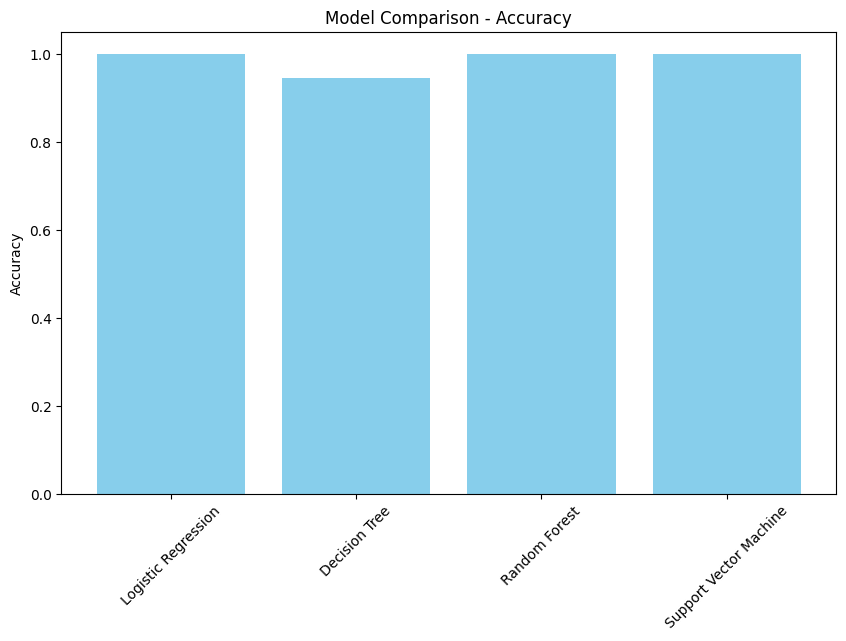

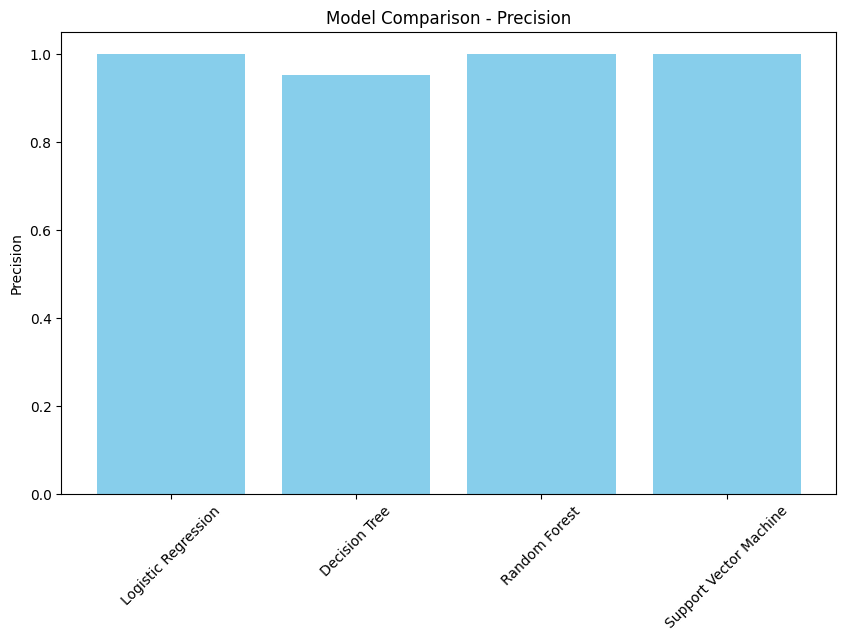

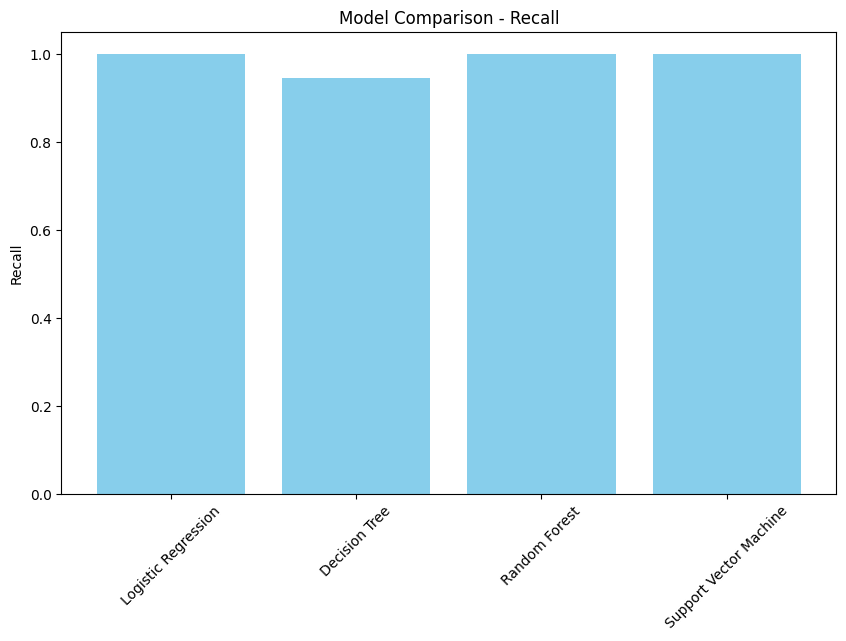

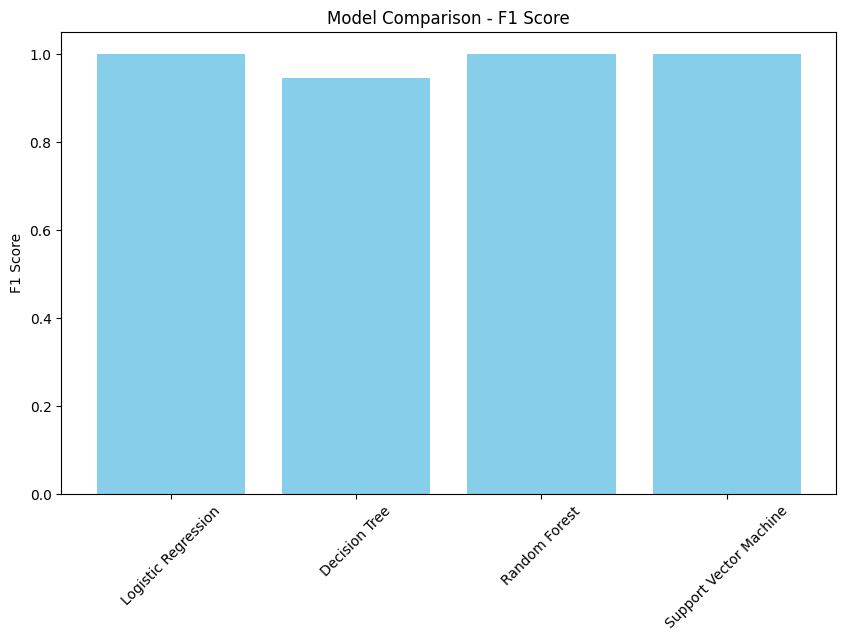


Best model based on F1 Score: Logistic Regression


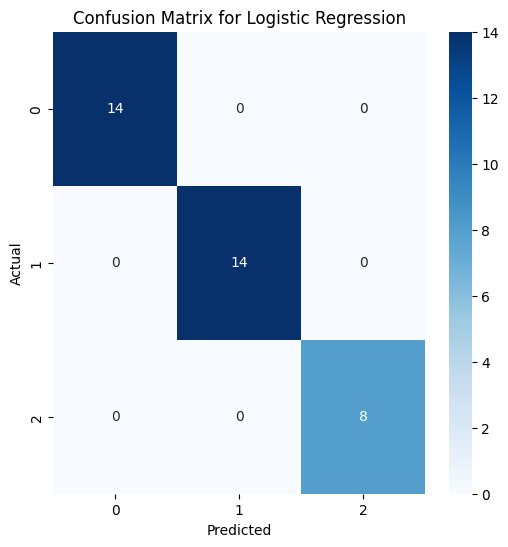


Enter values for prediction (comma-separated) based on the following features:
alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline
Type 'exit' to quit.
21,21,21,23,23,23,21,21,21,23,23,23,52
Prediction: class_0

Enter values for prediction (comma-separated) based on the following features:
alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline
Type 'exit' to quit.
52,51,52,51,56,62,62,62,62,62,32,32,23
Prediction: class_0

Enter values for prediction (comma-separated) based on the following features:
alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline
Type 'exit' to quit.
exit


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_wine

# Load the Wine dataset
def load_data():
    wine = load_wine()
    df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
    df['target'] = wine.target
    return df, wine

# Preprocessing the data
def preprocess_data(df):
    X = df.iloc[:, :-1].values  # Features
    y = df.iloc[:, -1].values   # Target variable

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling (optional, depending on the algorithm)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, scaler

# Train models and evaluate them
def train_and_evaluate(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=10000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC()
    }

    results = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }

    return results

# Plotting function for model evaluation results
def plot_model_comparison(results):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    for metric in metrics:
        plt.figure(figsize=(10, 6))
        model_names = list(results.keys())
        scores = [results[model][metric] for model in model_names]
        plt.bar(model_names, scores, color='skyblue')
        plt.title(f'Model Comparison - {metric}')
        plt.ylabel(f'{metric}')
        plt.xticks(rotation=45)
        plt.show()

# Plotting function for confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# CLI for user input and prediction
def predict_with_model(model, scaler, feature_names, target_names):
    while True:
        print("\nEnter values for prediction (comma-separated) based on the following features:")
        print(", ".join(feature_names))
        print("Type 'exit' to quit.")

        user_input = input()

        if user_input.lower() == 'exit':
            break

        try:
            input_values = list(map(float, user_input.split(',')))
            input_values = scaler.transform([input_values])  # Apply the same scaling
            prediction = model.predict(input_values)
            print(f"Prediction: {target_names[prediction[0]]}")  # Map to class name
        except ValueError:
            print("Invalid input, please enter numeric values.")

# Main program
def main():
    df, wine = load_data()
    X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

    # Train and evaluate models
    results = train_and_evaluate(X_train, X_test, y_train, y_test)

    # Print model evaluation results
    print("\nModel Evaluation Results:")
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        for metric, value in metrics.items():
            if metric != 'Confusion Matrix':
                print(f"{metric}: {value:.4f}")

    # Plot model comparison
    plot_model_comparison(results)

    # Choose the best model (based on F1 score, for example)
    best_model_name = max(results, key=lambda model: results[model]['F1 Score'])
    print(f"\nBest model based on F1 Score: {best_model_name}")

    # Plot confusion matrix for the best model
    plot_confusion_matrix(results[best_model_name]['Confusion Matrix'], best_model_name)

    # Train the best model again and make predictions
    best_model = {
        'Logistic Regression': LogisticRegression(max_iter=10000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC()
    }[best_model_name]

    best_model.fit(X_train, y_train)

    # CLI for user input predictions
    predict_with_model(best_model, scaler, wine.feature_names, wine.target_names)

if __name__ == "__main__":
    main()
